In [1]:
import torch
import torchvision.datasets as datasets

mnist_trainset = datasets.MNIST('./data/', train=True)
len(mnist_trainset)

/Users/modsoussi/anaconda3/envs/fastai/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


60000

In [2]:
train_imgs, train_labels = list(zip(*mnist_trainset))


In [3]:

train_x = torch.stack([torch.tensor(img.getdata(), device='mps', dtype=torch.float32)/255 for img in train_imgs])
train_x.shape

torch.Size([60000, 784])

In [4]:
train_y = torch.tensor(train_labels, device='mps')
train_y.shape

torch.Size([60000])

In [5]:
train_y[0]

tensor(5, device='mps:0')

In [6]:
model = torch.nn.Sequential(
  torch.nn.Linear(28*28, 400, device='mps'),
  torch.nn.ReLU(),
  torch.nn.Linear(400, 10, device='mps'),
)

In [7]:
preds = model(train_x[:5])

In [8]:
preds[range(5), train_y[:5]]

tensor([ 0.1487, -0.0166, -0.0190, -0.0831,  0.0161], device='mps:0',
       grad_fn=<IndexBackward0>)

In [9]:
loss = -torch.log(preds.softmax(dim=1)[range(5), train_y[:5]]).mean()

In [10]:
torch.nn.CrossEntropyLoss()(preds, train_y[:5])

tensor(2.3319, device='mps:0', grad_fn=<NllLossBackward0>)

In [11]:
loss.backward()

In [12]:
for p in model.parameters():
  p.data -= p.grad.data

In [13]:
for p in model.parameters():
  p.grad.zero_()

In [14]:
def fn_loss(preds, acts):
  idx = range(len(acts))
  return -torch.log(preds.softmax(dim=1)[idx, acts]).mean()

In [15]:
model(train_x[:5])

tensor([[ 1.9645,  0.8568, -1.4238, -1.1539,  0.2274,  3.9762, -1.4789, -1.3855,
         -1.4252,  0.7319],
        [ 3.9788,  0.7815, -1.4726, -1.3140,  0.3024,  2.0331, -1.4514, -1.5985,
         -1.4848,  1.1528],
        [ 0.7438,  0.3083, -0.6277, -0.5986,  1.6379,  0.6539, -0.6198, -0.6660,
         -0.6205,  0.6776],
        [ 0.9861,  2.0280, -0.8146, -0.7078,  0.1025,  1.0068, -0.7072, -0.9441,
         -0.9051,  0.6595],
        [ 1.3268,  0.6668, -1.0453, -0.9016,  0.3614,  0.9946, -1.0703, -1.1710,
         -1.2844,  2.5770]], device='mps:0', grad_fn=<LinearBackward0>)

In [16]:
loss = fn_loss(model(train_x[:5]), train_y[:5])

In [17]:
loss.backward()
for p in model.parameters():
  p.data -= p.grad.data
  
for p in model.parameters():
  p.grad.zero_()

In [18]:
loss = fn_loss(model(train_x[:5]), train_y[:5])
loss

tensor(0.1048, device='mps:0', grad_fn=<NegBackward0>)

In [19]:
model(train_x[:5]).softmax(dim=1)[range(5), train_y[:5]]

tensor([0.7993, 0.7671, 0.9849, 0.9891, 0.9915], device='mps:0',
       grad_fn=<IndexBackward0>)

In [20]:
model(train_x[5:10]).softmax(dim=1)[range(5), train_y[5:10]]

tensor([0.0023, 0.1999, 0.0008, 0.1766, 0.4570], device='mps:0',
       grad_fn=<IndexBackward0>)

In [21]:
def accuracy(preds, acts, th=.95):
  idx = range(len(acts))
  return (preds.softmax(dim=1)[idx, acts] > th).float().mean()

In [22]:
accuracy(model(train_x[:5]), train_y[:5])

tensor(0.6000, device='mps:0')

In [23]:
def train(model, X, y, num_epochs=5, lr=1e-3):
  for i in range(num_epochs):
    preds = model(X)
    loss = fn_loss(preds, y)
    loss.backward()
    
    for p in model.parameters():
      p.data -= p.grad.data * lr
      
    for p in model.parameters():
      p.grad.zero_()
      
    print(loss.data, accuracy(model(X), y))

In [24]:
train(model, train_x, train_y, lr=.7, num_epochs=50)

tensor(3.5517, device='mps:0') tensor(0., device='mps:0')
tensor(2.4598, device='mps:0') tensor(0., device='mps:0')
tensor(2.1253, device='mps:0') tensor(0., device='mps:0')
tensor(1.9310, device='mps:0') tensor(1.6667e-05, device='mps:0')
tensor(1.7285, device='mps:0') tensor(0.0010, device='mps:0')
tensor(1.5305, device='mps:0') tensor(0.0133, device='mps:0')
tensor(1.3333, device='mps:0') tensor(0.0097, device='mps:0')
tensor(1.1613, device='mps:0') tensor(0.0324, device='mps:0')
tensor(1.0253, device='mps:0') tensor(0.0108, device='mps:0')
tensor(0.9335, device='mps:0') tensor(0.0558, device='mps:0')
tensor(0.9417, device='mps:0') tensor(0.0022, device='mps:0')
tensor(1.2737, device='mps:0') tensor(0.0938, device='mps:0')
tensor(1.9281, device='mps:0') tensor(0.0821, device='mps:0')
tensor(1.5810, device='mps:0') tensor(0.0370, device='mps:0')
tensor(1.1014, device='mps:0') tensor(0.0426, device='mps:0')
tensor(0.8199, device='mps:0') tensor(0.0749, device='mps:0')
tensor(0.7054, d

In [25]:
model(train_x[:25]).softmax(dim=1)[range(25), train_y[:25]]

tensor([0.8712, 0.9995, 0.9955, 0.9899, 0.8949, 0.8974, 0.9824, 0.9971, 0.9764,
        0.9952, 0.9976, 0.2524, 0.9985, 0.9794, 0.9820, 0.9674, 0.9590, 0.8057,
        0.7049, 0.5023, 0.9950, 0.9961, 0.4960, 0.9854, 0.0295],
       device='mps:0', grad_fn=<IndexBackward0>)

In [26]:
mnist_trainset[24][0]

In [27]:
model(train_x[24]).softmax(dim=0)

tensor([0.0481, 0.0295, 0.2273, 0.1383, 0.0041, 0.2157, 0.2223, 0.0661, 0.0185,
        0.0301], device='mps:0', grad_fn=<SoftmaxBackward0>)

In [28]:
mnist_testset = datasets.MNIST('./data/', train=False, download=True)

In [29]:
test_imgs, test_labels = list(zip(*mnist_testset))

In [30]:
test_x = torch.stack([torch.tensor(img.getdata(), device='mps', dtype=torch.float32)/255 for img in test_imgs])
test_x.shape

torch.Size([10000, 784])

In [31]:
test_y = torch.tensor(test_labels, device='mps')
test_y.shape

torch.Size([10000])

In [32]:
print(fn_loss(model(test_x), test_y), accuracy(model(test_x), test_y))

tensor(0.3489, device='mps:0', grad_fn=<NegBackward0>) tensor(0.4719, device='mps:0')


In [33]:
model2 = torch.nn.Sequential(
  torch.nn.Linear(28*28, 1024, device='mps'),
  torch.nn.ReLU(),
  torch.nn.Linear(1024, 512, device='mps'),
  torch.nn.ReLU(),
  torch.nn.Linear(512, 256, device='mps'),
  torch.nn.ReLU(),
  torch.nn.Linear(256, 10, device='mps')
)

In [34]:
train(model2, train_x, train_y, num_epochs=100, lr=.5)

tensor(2.3051, device='mps:0') tensor(0., device='mps:0')
tensor(2.3000, device='mps:0') tensor(0., device='mps:0')
tensor(2.2949, device='mps:0') tensor(0., device='mps:0')
tensor(2.2895, device='mps:0') tensor(0., device='mps:0')
tensor(2.2837, device='mps:0') tensor(0., device='mps:0')
tensor(2.2771, device='mps:0') tensor(0., device='mps:0')
tensor(2.2695, device='mps:0') tensor(0., device='mps:0')
tensor(2.2606, device='mps:0') tensor(0., device='mps:0')
tensor(2.2496, device='mps:0') tensor(0., device='mps:0')
tensor(2.2360, device='mps:0') tensor(0., device='mps:0')
tensor(2.2188, device='mps:0') tensor(0., device='mps:0')
tensor(2.1969, device='mps:0') tensor(0., device='mps:0')
tensor(2.1685, device='mps:0') tensor(0., device='mps:0')
tensor(2.1312, device='mps:0') tensor(0., device='mps:0')
tensor(2.0821, device='mps:0') tensor(0., device='mps:0')
tensor(2.0182, device='mps:0') tensor(0., device='mps:0')
tensor(1.9372, device='mps:0') tensor(0., device='mps:0')
tensor(1.8371,

In [35]:
print(fn_loss(model2(test_x), test_y).data, accuracy(model2(test_x), test_y))

tensor(0.3366, device='mps:0') tensor(0.5291, device='mps:0')


In [36]:
model3 = torch.nn.Sequential(
  torch.nn.Linear(28*28, 1024, device='mps'),
  torch.nn.ReLU(),
  torch.nn.Linear(1024, 512, device='mps'),
  torch.nn.Tanh(),
  torch.nn.Linear(512, 256, device='mps'),
  torch.nn.ReLU(),
  torch.nn.Linear(256, 10, device='mps')
)

In [37]:
train(model3, train_x, train_y, num_epochs=100, lr=5e-1)

tensor(2.3037, device='mps:0') tensor(0., device='mps:0')
tensor(2.2914, device='mps:0') tensor(0., device='mps:0')
tensor(2.2790, device='mps:0') tensor(0., device='mps:0')
tensor(2.2652, device='mps:0') tensor(0., device='mps:0')
tensor(2.2491, device='mps:0') tensor(0., device='mps:0')
tensor(2.2298, device='mps:0') tensor(0., device='mps:0')
tensor(2.2058, device='mps:0') tensor(0., device='mps:0')
tensor(2.1751, device='mps:0') tensor(0., device='mps:0')
tensor(2.1351, device='mps:0') tensor(0., device='mps:0')
tensor(2.0821, device='mps:0') tensor(0., device='mps:0')
tensor(2.0116, device='mps:0') tensor(0., device='mps:0')
tensor(1.9189, device='mps:0') tensor(0., device='mps:0')
tensor(1.8011, device='mps:0') tensor(0., device='mps:0')
tensor(1.6612, device='mps:0') tensor(0., device='mps:0')
tensor(1.5085, device='mps:0') tensor(0., device='mps:0')
tensor(1.3551, device='mps:0') tensor(0., device='mps:0')
tensor(1.2175, device='mps:0') tensor(0., device='mps:0')
tensor(1.2572,

In [38]:
print(fn_loss(model3(test_x), test_y).data, accuracy(model3(test_x), test_y))

tensor(0.3257, device='mps:0') tensor(0.4595, device='mps:0')


In [39]:
model3(test_x[:5]).softmax(dim=1)[range(5), test_y[:5]]

tensor([0.9957, 0.9477, 0.9727, 0.9857, 0.8804], device='mps:0',
       grad_fn=<IndexBackward0>)

In [50]:
accuracy(model(test_x), test_y, th=.5)

tensor(0.8666, device='mps:0')

In [58]:
for m in model3.modules():
  print(m)

Sequential(
  (0): Linear(in_features=784, out_features=1024, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1024, out_features=512, bias=True)
  (3): Tanh()
  (4): Linear(in_features=512, out_features=256, bias=True)
  (5): ReLU()
  (6): Linear(in_features=256, out_features=10, bias=True)
)
Linear(in_features=784, out_features=1024, bias=True)
ReLU()
Linear(in_features=1024, out_features=512, bias=True)
Tanh()
Linear(in_features=512, out_features=256, bias=True)
ReLU()
Linear(in_features=256, out_features=10, bias=True)


In [62]:
layers = list(model3.modules())[1:]
layers

[Linear(in_features=784, out_features=1024, bias=True),
 ReLU(),
 Linear(in_features=1024, out_features=512, bias=True),
 Tanh(),
 Linear(in_features=512, out_features=256, bias=True),
 ReLU(),
 Linear(in_features=256, out_features=10, bias=True)]

In [68]:
layer1_projection = (layers[1](layers[0](train_x[0]))*255).round()
layer1_projection.shape

torch.Size([1024])

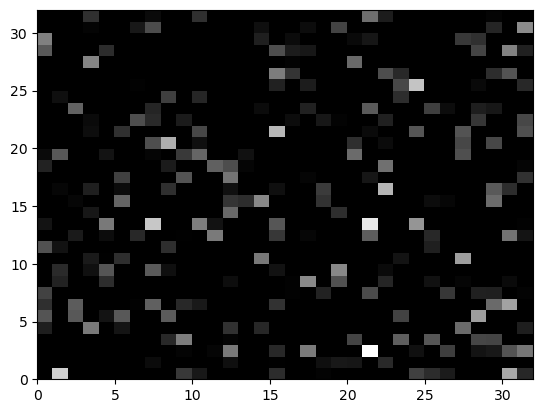

In [79]:
from matplotlib import pyplot as plt

plt.gray()
plt.pcolor(layer1_projection.reshape(32,32).detach().cpu().numpy())